## 0 Step. Example Datasets

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import json

COLOR_TABLE = {
    0:"red",
    1:"lime",
    2:"cyan",
    3:"magenta",
    4:"black"
}

BASE_COLOR = "lightblue"

number_of_points = 1000
X = np.random.rand(number_of_points)
Y = np.random.rand(number_of_points)

print(len(X), len(Y))

1000 1000


In [140]:
save_data = {
    "x" : X.tolist(),
    "y" : Y.tolist()
}

with open("k_means_example_data.json", "w") as filestream:
    json.dump(save_data, filestream)

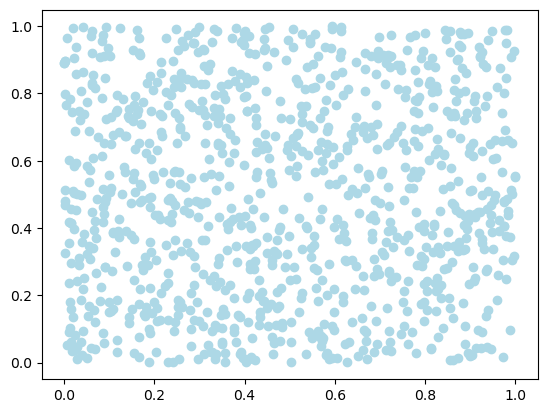

In [141]:
plt.scatter(X,Y,color=BASE_COLOR)
plt.show()

## 1 Step. 임의의 K개의 중심점(Centroids)을 선택한다.


In [142]:
K = 5
sample_indexes = [ np.random.randint(low=0, high=number_of_points) for _ in range(K)]
print(sample_indexes)

[998, 251, 58, 468, 32]


In [143]:
color_sample = dict()
for i in range(K):
    color_sample[i] = {
        "x" : X[sample_indexes[i]],
        "y" : Y[sample_indexes[i]]
    }

print(color_sample)

{0: {'x': 0.5374029239833374, 'y': 0.878682019978903}, 1: {'x': 0.9101935661789444, 'y': 0.25061059492605264}, 2: {'x': 0.5158343238623136, 'y': 0.6753079749001858}, 3: {'x': 0.40458632567515374, 'y': 0.19110707834612561}, 4: {'x': 0.3853488690557194, 'y': 0.14132411147815016}}


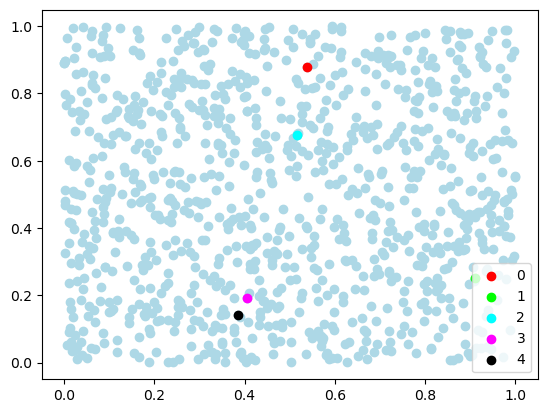

In [144]:
plt.scatter(X,Y,color=BASE_COLOR)

for key, value in color_sample.items():
    plt.scatter(value["x"], value["y"], label=f"{key}", color=COLOR_TABLE[key])
plt.legend()
plt.show()

## 2 Step. 각 데이터를 가장 가까운 중심점에 속한 그룹으로 분류한다.

In [145]:

def get_distance (x1, y1, x2, y2):
    return np.sqrt( np.power( max(x1, x2) - min(x1, x2), 2) + np.power( max(y1, y2) - min(y1, y2), 2))

shortest_list=list()
for x, y in zip(X, Y):
    distance_list=list()
    for key, value in color_sample.items():
        distance = get_distance(x, y, value["x"], value["y"])
        distance_list.append(distance)
    
    shortest_index=np.argmin(distance_list)
    shortest_list.append(shortest_index)

print(shortest_list)

[0, 3, 0, 1, 4, 1, 2, 1, 0, 4, 2, 4, 0, 0, 1, 4, 2, 4, 0, 3, 1, 1, 0, 2, 3, 3, 2, 3, 2, 4, 2, 0, 4, 0, 3, 4, 4, 0, 4, 3, 4, 2, 4, 0, 3, 0, 4, 3, 3, 0, 2, 4, 3, 2, 3, 2, 3, 4, 2, 2, 0, 1, 0, 0, 0, 4, 3, 1, 2, 2, 3, 0, 1, 0, 1, 1, 0, 3, 2, 0, 4, 4, 4, 1, 3, 1, 4, 3, 0, 4, 3, 3, 3, 1, 2, 2, 0, 4, 3, 3, 4, 0, 2, 4, 1, 2, 2, 0, 2, 1, 2, 2, 3, 2, 1, 3, 3, 1, 1, 2, 2, 0, 3, 0, 0, 2, 0, 4, 4, 3, 1, 2, 2, 2, 3, 0, 2, 4, 2, 4, 2, 1, 3, 2, 1, 1, 3, 2, 0, 2, 3, 2, 1, 4, 3, 2, 3, 2, 0, 0, 2, 2, 3, 0, 3, 1, 2, 1, 2, 1, 1, 3, 3, 3, 3, 2, 1, 3, 2, 2, 1, 4, 3, 2, 0, 1, 4, 0, 1, 0, 0, 3, 3, 2, 4, 2, 2, 3, 3, 2, 1, 0, 3, 0, 1, 1, 2, 0, 4, 3, 2, 1, 3, 1, 3, 4, 2, 2, 1, 2, 2, 4, 2, 2, 3, 0, 0, 3, 2, 2, 2, 0, 3, 1, 2, 1, 0, 1, 2, 2, 0, 2, 2, 1, 3, 3, 4, 4, 1, 2, 1, 1, 4, 1, 2, 0, 2, 3, 4, 2, 3, 1, 4, 1, 3, 3, 1, 3, 0, 2, 1, 0, 1, 0, 3, 1, 3, 0, 4, 3, 4, 3, 4, 1, 0, 0, 0, 4, 0, 0, 1, 3, 2, 2, 4, 1, 2, 1, 3, 3, 1, 0, 4, 3, 0, 0, 1, 4, 3, 3, 2, 0, 3, 2, 0, 4, 3, 3, 3, 0, 0, 0, 0, 1, 4, 1, 1, 0, 1, 2, 2, 3, 4, 

In [146]:
cluster = dict()
for idx, shortest_idx in enumerate(shortest_list):
    if shortest_idx not in cluster.keys():
        cluster[shortest_idx] = list()
        cluster[shortest_idx].append( [X[idx], Y[idx]])
    else:
        cluster[shortest_idx].append( [X[idx], Y[idx]])

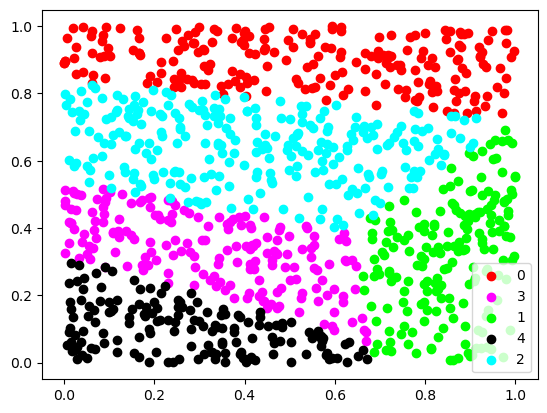

In [147]:
for key, value in cluster.items():
    data = np.array(value)
    x=data[:,0]
    y=data[:,1]
    plt.scatter(x,y,label=f"{key}", color = COLOR_TABLE[key])
plt.legend()
plt.show()

## 3 Step. 그룹의 중심점을 새로 계산한다.

In [148]:
new_centroids = dict()

for key, value in cluster.items():
    data = np.array(value)
    new_x = np.mean(data[:,0])
    new_y = np.mean(data[:,1])

    new_centroids[key] = {
        "x":new_x,
        "y":new_y
    }

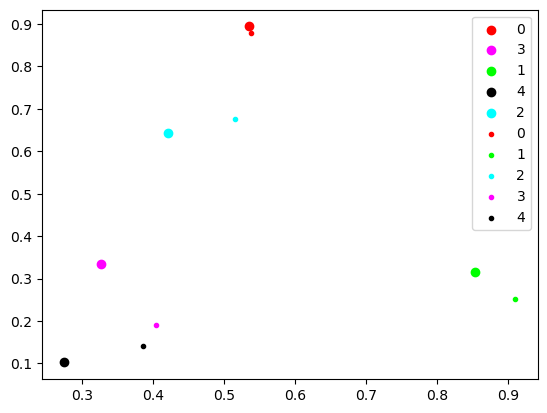

In [149]:
for key, value in new_centroids.items():
    plt.scatter(value["x"], value["y"], label=f"{key}", color=COLOR_TABLE[key])
    
for key, value in color_sample.items():
    plt.scatter(value["x"], value["y"], label=f"{key}", color=COLOR_TABLE[key], marker=".")

plt.legend()
plt.show()

## 4 Step. 2 ~ 3 단계를 새로운 중심점과 기존 중심점이 충분히 일치할 때까지 반복한다.


In [150]:
stop_condition = 0.05

centroids = color_sample
new_centroids = new_centroids

loop_cnt = 0

while True:
    shortest_list=list()
    for x, y in zip(X, Y):
        distance_list=list()
        for key, value in color_sample.items():
            distance = get_distance(x, y, value["x"], value["y"])
            distance_list.append(distance)
        
        shortest_index=np.argmin(distance_list)
        shortest_list.append(shortest_index)

    tmp_cluster = dict()
    for idx, shortest_idx in enumerate(shortest_list):
        if shortest_idx not in tmp_cluster.keys():
            tmp_cluster[shortest_idx] = list()
            tmp_cluster[shortest_idx].append( [X[idx], Y[idx]])
        else:
            tmp_cluster[shortest_idx].append( [X[idx], Y[idx]])

    new_centroids = dict()
    for key, value in tmp_cluster.items():
        data = np.array(value)
        new_x = np.mean(data[:,0])
        new_y = np.mean(data[:,1])

        new_centroids[key] = {
            "x":new_x,
            "y":new_y
    }
    
    is_stop_list = list()
    for key, value in centroids.items():
        old_centroid_x = centroids[key]["x"]
        old_centroid_y = centroids[key]["y"]
        new_centroid_x = new_centroids[key]["x"]
        new_centroid_y = new_centroids[key]["y"]

        diff_x = np.abs(old_centroid_x - new_centroid_x)
        diff_y = np.abs(old_centroid_y - new_centroid_y)

        if (diff_x <= stop_condition and diff_y <= stop_condition):
            is_stop_list.append(True)
        else:
            is_stop_list.append(False)

    is_stop = all(is_stop_list)
    print(is_stop)
    loop_cnt+=1
    if is_stop:
        break

    centroids = new_centroids


False
True


In [151]:
print(loop_cnt)

2


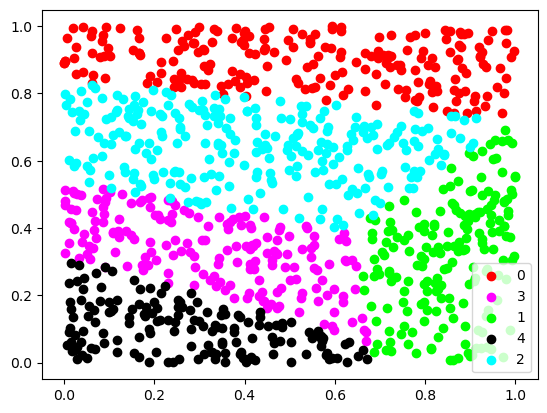

In [152]:
for key, value in tmp_cluster.items():
    data = np.array(value)
    x=data[:,0]
    y=data[:,1]
    plt.scatter(x,y,label=f"{key}", color = COLOR_TABLE[key])
plt.legend()
plt.show()